# Example of running BioJava in a Jupyter Notebook
This notebook demonstrates how to setup the BioJava dependencies, run BioJava code using the Java Kernel, and finally use a Python cell to plot results.

### Setup BioJava dependencies
Configure class path resolver to use a local copy of jar files in the maven repository (~/.m2/repository).

In [1]:
%classpath config resolver mvnLocal

Added new repo: mvnLocal


Load the required dependencies from the local maven repository.

In [2]:
%classpath add mvn org.biojava biojava-structure 5.1.1

### Define method to calculate tri-axial ellipsoid radii for a protein chain
Three ellipse radii a <= b <= c define a tri-axial ellipsoid along the axes of inertia along a protein chain.

![ellipsoid](../images/ellipsoid.png)

The class below calculates the ellipsoid radii. Note, each code cell must be a compilable unit, e.g., a class definition.

In [3]:
import org.biojava.nbio.structure.*;
import org.biojava.nbio.structure.geometry.*;

public class Shape {
    public static double[] getEllipsisRadii(Chain c) {
        MomentsOfInertia moi = new MomentsOfInertia();
        // use C-alpha atoms only
        for (Atom a: StructureTools.getAtomCAArray(c)) {
            moi.addPoint(a.getCoordsAsPoint3d(), 1.0);
        }
        return moi.getElipsisRadii();
    }
}

com.twosigma.beaker.javash.bkra0a059fe.Shape

## Calculate ellipse radii for a representative subset of PDB chains
Imports are not global, they need to be defined for each cell. However, classes defined in other cells can be accessed.

In [4]:
import java.util.*;
import java.io.*;
import org.biojava.nbio.structure.*;
import org.biojava.nbio.structure.symmetry.utils.BlastClustReader;

// store PDB chain id and ellipse radii in a csv file
String fileName = "radii.csv";
PrintWriter pw = new PrintWriter(new FileWriter(fileName));
pw.println("id,a,b,c");

// use increment to only use every n-th representative
int count = 0;
int n = 100;

// get representative PDB protein chains for 30% sequence identity clusters
BlastClustReader br = new BlastClustReader(30);

for (List<String> cluster: br.getPdbChainIdClusters()) {
    // sample every n-th representative
    if (count++ % n == 0) {
        
        // get the id for first chain in each sequence cluster
        String pdbChainId = cluster.get(0);
        System.out.print(pdbChainId + " ");
        
        // download chain
        Structure s = StructureIO.getStructure(pdbChainId);
        Chain c = s.getPolyChains().get(0);
        
        // calculate and save ellipse radii
        double[] r = Shape.getEllipsisRadii(c);
        pw.println(pdbChainId + "," + r[0] + "," + r[1] + "," + r[2]);
    }
}
pw.close();

4IML.H 4Y82.M 4H9U.A 5QJY.A 1VAX.A 4P3Y.B 1MUP.A 3ZNJ.1 1KC8.J 1VQ9.U 1A5L.C 3JRU.B 4Z7Y.A 3CFV.B 2CYY.A 4NDY.D 2HF7.A 4N6V.2 3IYH.A 2ZZS.A 4BV6.A 1R88.A 5VHE.A 3VOO.A 1S9K.C 1M0D.A 2JPP.A 5GUP.2 5LUT.A 2H21.A 4V98.AM 5K31.A 3TLZ.A 3HQM.A 4MGP.A 1XBR.A 2VQL.A 3BOL.A 5N03.D 5WTR.A 3ITQ.A 2VSK.A 6GAW.CL 5K6Z.A 6FTQ.A 3GE5.A 1FS2.A 5BXP.A 4BL0.A 1XF7.A 3JA7.A 4JRE.A 5COM.A 4K35.A 1SGG.A 1LQL.A 4O96.A 6CIJ.N 5O09.1C 3LXR.F 5YHI.A 5F8E.A 5UNQ.A 5VOX.e 3R18.A 6HPW.A 5WXI.A 5Z57.P 2EV2.A 1DM0.A 5C59.A 3J7Y.h 3C05.A 5BYH.M 3KT1.A 3VTA.A 2NML.A 2EWN.A 6CON.A 4MH0.E 2MOB.A 6EJF.J 2YN3.A 3AL8.A 1NAA.A 2I7H.A 2X8P.A 1G7D.A 4HHQ.A 1Y9Z.A 4CU5.A 6GAZ.AO 2WAL.A 4BFG.A 2OJQ.A 6FNO.A 4V4I.H 5M0Y.B 5CM9.A 4KYI.A 4UD1.A 5LF9.A 1RP3.B 3BRT.A 3WO0.A 1YFN.E 3BS6.A 3BPJ.A 1QCW.A 5ZCY.A 6FES.A 4WJV.I 4CTI.A 5EXR.B 3CVO.A 1YDW.A 4I5N.B 3QZ0.A 3OEO.A 1K3R.A 5WZZ.E 5KOM.A 4NZG.A 3QXB.A 2PD1.A 5E8B.A 1RFZ.A 3IHL.A 1EQF.A 4J1V.E 5M8J.A 6GCZ.A 3O0Y.A 2D9N.A 4NYQ.A 2ZAE.A 2WX3.A 3HY8.A 2NRG.A 3C24.A 4R14.A 5MRF.M 2K

null

## Plot the distribution of ellipse radii
Java and Python code can be mixed. Here a Python code cell is used to plot results.

In [5]:
%%python
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("radii.csv")
df.head()

,id,a,b,c
0,4IML.H,11.157285,22.629641,23.599919
1,4Y82.M,12.189077,15.231136,16.971572
2,4H9U.A,14.008238,14.993670,15.836474
3,5QJY.A,11.247504,16.854019,17.282314
4,1VAX.A,14.103334,20.155992,21.609649


In [7]:
%%python
df.describe()

,a,b,c
count,290.000000,290.000000,290.000000
mean,10.607602,16.440926,17.483425
std,3.990159,6.134423,6.357957
min,1.781035,4.681052,4.887587
25%,8.226494,12.180130,13.007894
50%,10.764726,14.983243,16.184487
75%,13.341539,19.433500,20.659812
max,25.263396,47.087570,50.155539


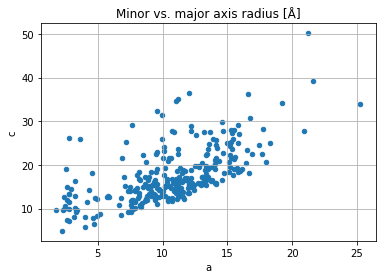

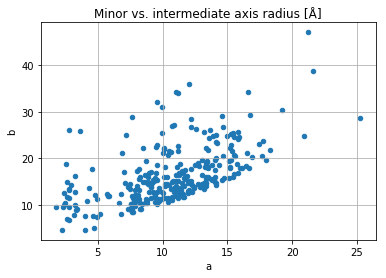

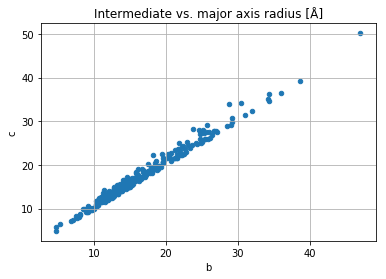

In [8]:
%%python
df.plot.scatter(x="a",y="c",grid=True,title="Minor vs. major axis radius [\u212B]")
df.plot.scatter(x="a",y="b",grid=True,title="Minor vs. intermediate axis radius [\u212B]")
df.plot.scatter(x="b",y="c",grid=True,title="Intermediate vs. major axis radius [\u212B]");